In [54]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
|#read the dataset, since its in .data format, mention its column names
df=pd.read_csv('iris.data',names=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Species'])
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### **DESCRIPTIVE ANALYSIS OF THE GIVEN DATASET**

In [43]:
df.columns

Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width',
       'Species'],
      dtype='object')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
df.describe(include="all")

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [45]:
df.shape

(150, 5)

In [46]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### **Preprocessing the dataset**

In [48]:
df.isna().any()

Sepal_Length    False
Sepal_Width     False
Petal_Length    False
Petal_Width     False
Species         False
dtype: bool

### Since we see no NA values and unwanted columns, we need not do more preprocessing for the dataset

### **Data Visualization**

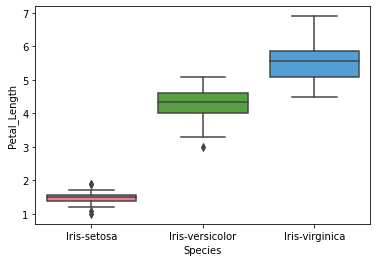

In [50]:
sns.boxplot(x="Species",y="Petal_Length",data=df,palette="husl")

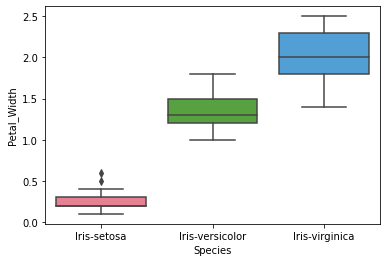

In [51]:
sns.boxplot(x="Species",y="Petal_Width",data=df,palette="husl")

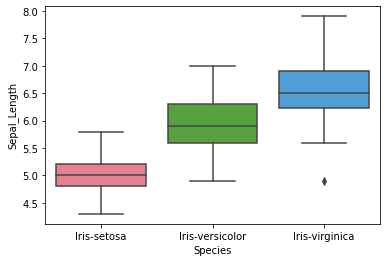

In [52]:
sns.boxplot(x="Species",y="Sepal_Length",data=df,palette="husl")

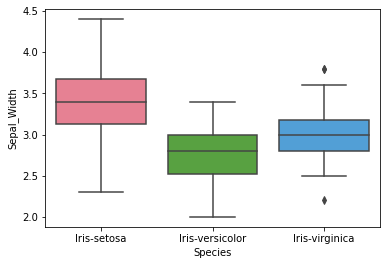

In [53]:
sns.boxplot(x="Species",y="Sepal_Width",data=df,palette="husl")

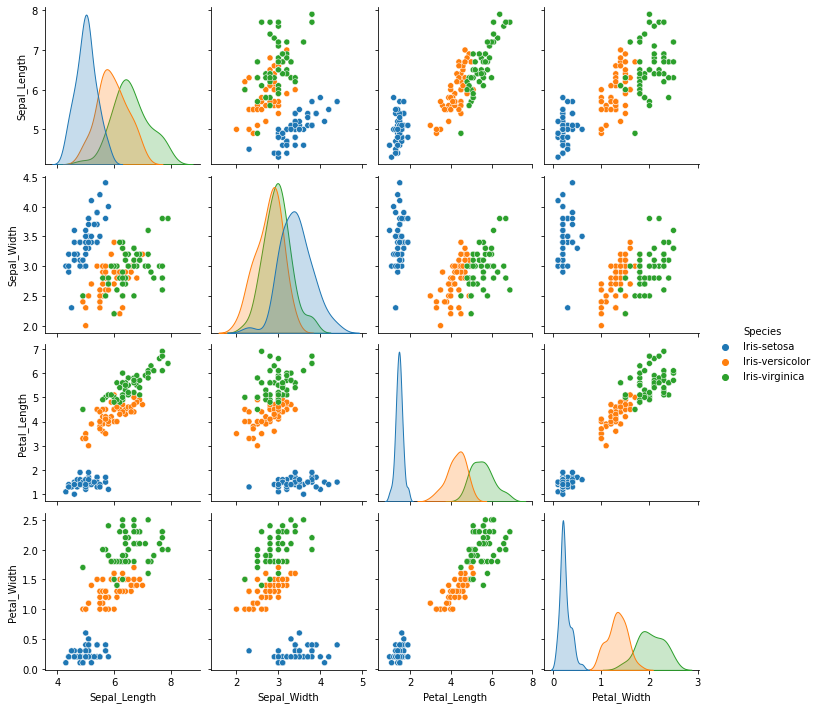

In [17]:
sns.pairplot(df,hue="Species")

Through this, we can actually understand how each species differ from the other in terms of sepal length, sepal width, petal length and petal width.

### **Correlation matrix**


In [18]:
df.corr()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
Sepal_Length,1.000000,-0.109369,0.871754,0.817954
Sepal_Width,-0.109369,1.000000,-0.420516,-0.356544
Petal_Length,0.871754,-0.420516,1.000000,0.962757
Petal_Width,0.817954,-0.356544,0.962757,1.000000


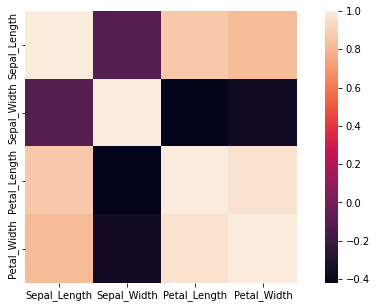

In [55]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(corr, square=True)

### **Model training**

In [19]:
#import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [38]:
X=df.drop(columns=['Species'])#all columns except species considered
Y=df['Species']
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)#split as 80% train and 20% test

In [56]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [60]:
predictions = model.predict(x_test)

#Check precision,recall,f1-score
print(classification_report(y_test,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [61]:
print("Accuracy is :",model.score(x_test,y_test))

Accuracy is : 1.0
